In [14]:
import os
import cv2
import h5py
import json
import keras
import random 
import imageio
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import plotly.express as px
from keras import backend as K
import matplotlib.pyplot as plt

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
Donations = pd.read_csv('/content/drive/My Drive/donorschoose/Donations.csv') 
Donations.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46
3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38


In [17]:
Donations.describe()

,Donation Amount,Donor Cart Sequence
count,4.687884e+06,4.687884e+06
mean,6.066879e+01,1.430545e+02
std,1.668996e+02,8.723086e+02
min,1.000000e-02,1.000000e+00
25%,1.482000e+01,1.000000e+00
50%,2.500000e+01,2.000000e+00
75%,5.000000e+01,1.200000e+01
max,6.000000e+04,1.811600e+04


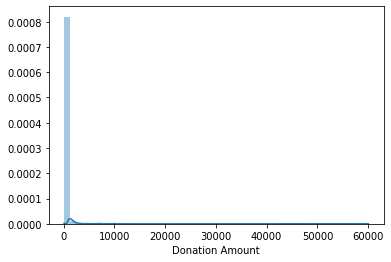

In [28]:
#Donation Amount betweeb Q1 and Q3
a=0.1
q1 = GDsDns["Donation Amount"].quantile(a)
q3 = GDsDns["Donation Amount"].quantile(1-a)
mask = Donations["Donation Amount"].between(q1, q3, inclusive=True)
iqr = Donations.loc[mask, "Donation Amount"]
sns.distplot(iqr)

In [19]:
Donors = pd.read_csv('/content/drive/My Drive/donorschoose/Donors.csv') 
Donors.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.



,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245
2,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953
3,00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,No,462
4,0000300773fe015f870914b42528541b,Paterson,New Jersey,No,075


In [20]:
Donors.describe()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
count,2122640,1909543,2122640,2122640,1942580
unique,2122640,15204,52,2,1934
top,c20b94883ba334876b85298d9d87f2da,Chicago,California,No,606
freq,1,34352,294695,1910355,34628


In [21]:
DsDns=pd.merge(Donations,Donors,on='Donor ID')

In [22]:
DsDns.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57,West Jordan,Utah,No,840
1,016510b8226e70d740130ac2dcfb6c5e,f7fc7cf0b8980fb00840b4afe7c1e761,1f4b5b6e68445c6c4a0509b3aca93f38,No,807.92,20,2016-12-21 13:03:59,West Jordan,Utah,No,840
2,03c8766872a129240d14be8c385b5f1a,5015b2df023ed47e7609e91ca65f7559,1f4b5b6e68445c6c4a0509b3aca93f38,No,288.99,71,2018-01-25 17:01:41,West Jordan,Utah,No,840
3,04bfceb168d816a3cbe52f1e70d30bf0,b8871d3666020f0a527c8d6b56361d1e,1f4b5b6e68445c6c4a0509b3aca93f38,No,1200.05,38,2017-10-18 12:26:15,West Jordan,Utah,No,840
4,05a4e3418a97f2df3a6cc8ae8fbde60c,8bc4de01f65d42a611236e083c6f3473,1f4b5b6e68445c6c4a0509b3aca93f38,No,565.26,75,2018-01-25 18:00:23,West Jordan,Utah,No,840


In [23]:
DsDns.describe()

,Donation Amount,Donor Cart Sequence
count,4.681900e+06,4.681900e+06
mean,6.067444e+01,1.432359e+02
std,1.669572e+02,8.728512e+02
min,1.000000e-02,1.000000e+00
25%,1.463000e+01,1.000000e+00
50%,2.500000e+01,2.000000e+00
75%,5.000000e+01,1.200000e+01
max,6.000000e+04,1.811600e+04


In [25]:
GDsDns=DsDns.groupby(['Donor Zip']).sum()
GDsDns.describe()

,Donation Amount,Donor Cart Sequence
count,1.931000e+03,1.931000e+03
mean,1.412322e+05,3.170219e+05
std,4.255061e+05,4.541496e+06
min,5.000000e+00,1.000000e+00
25%,6.832500e+02,2.500000e+01
50%,8.225760e+03,6.350000e+02
75%,1.016013e+05,1.900200e+04
max,9.735845e+06,1.641814e+08


In [24]:
GDsDns

,Donation Amount,Donor Cart Sequence
Donor Zip,,
0.0,174.00,3
7.0,125.00,3
9.0,125.71,6
10.0,5839.88,3844
11.0,150.00,4
...,...,...
k6v,115.00,3
mi,80.00,3
n19,50.00,1


In [52]:
sorted(GDsDns["Donation Amount"])

[5.0,
 5.0,
 5.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 11.45,
 12.0,
 15.0,
 15.0,
 20.0,
 20.0,
 20.0,
 20.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 28.74,
 29.93,
 30.0,
 30.0,
 30.0,
 35.0,
 35.0,
 35.28,
 37.0,
 38.0,
 38.58,
 40.0,
 45.0,
 45.0,
 45.0,
 48.0,
 49.76,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 51.0,
 55.0,
 55.0,
 57.87,
 58.67,
 60.0,
 60.0,
 60.0,
 60.0,
 62.5,
 65.0,
 65.0,
 65.0,
 67.0,
 70.0,
 70.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 75.0,
 

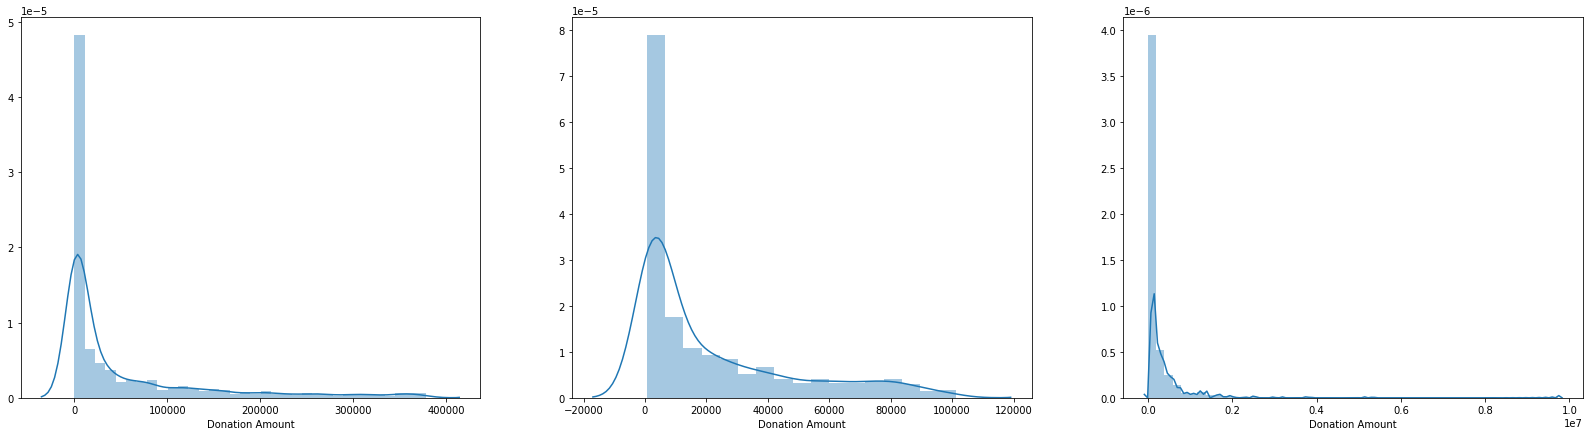

In [50]:
f, axes = plt.subplots(1, 3,figsize=(28,7))
a=0.1
q1 = GDsDns["Donation Amount"].quantile(a)
q3 = GDsDns["Donation Amount"].quantile(1-a)
mask = GDsDns["Donation Amount"].between(q1, q3, inclusive=True)
iqr = GDsDns.loc[mask, "Donation Amount"]
sns.distplot(iqr, ax=axes[0])

a=0.25
q1 = GDsDns["Donation Amount"].quantile(a)
q3 = GDsDns["Donation Amount"].quantile(1-a)
mask = GDsDns["Donation Amount"].between(q1, q3, inclusive=True)
iqr = GDsDns.loc[mask, "Donation Amount"]
sns.distplot(iqr, ax=axes[1])

q1 = GDsDns["Donation Amount"].quantile(0.25)
q3 = GDsDns["Donation Amount"].quantile(1)
mask = GDsDns["Donation Amount"].between(q1, q3, inclusive=True)
iqr = GDsDns.loc[mask, "Donation Amount"]
sns.distplot(iqr, ax=axes[2])

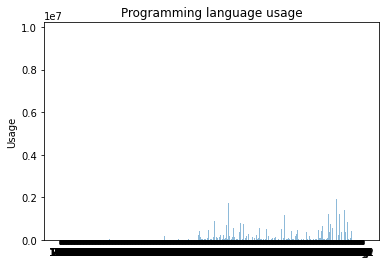

In [ ]:
# plt.plot(GDsDns.index,GDsDns["Donation Amount"])
y_pos = np.arange(len(GDsDns.index))
plt.bar(y_pos, GDsDns["Donation Amount"], align='center', alpha=0.5)
plt.xticks(y_pos, GDsDns.index)
plt.show()

In [ ]:
Projects = pd.read_csv('/content/drive/My Drive/donorschoose/Projects.csv') 
Projects.head()

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22
3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06
4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01


In [ ]:
Projects.describe()

,Teacher Project Posted Sequence,Project Cost
count,1.110017e+06,1.110017e+06
mean,1.124050e+01,7.415240e+02
std,2.595475e+01,1.083256e+03
min,1.000000e+00,3.529000e+01
25%,1.000000e+00,3.351200e+02
50%,3.000000e+00,5.153500e+02
75%,9.000000e+00,8.675200e+02
max,4.970000e+02,2.557377e+05
